## Import Libraries
torch.nn: submodule with tools
- nn.Module: base class for all PyTorch models
- nn.Linear: fully connect (dense) layers
- activation functions: nn.ReLU() and nn.Sigmoid()
- loss functions: nn.BCELoss() and nn.CrossEntropyLoss()

torch.optim: provides built-in optimization algorithms (optimizers)
- optim.SGD (Stochastic Gradient Descent)
- optim.Adam (Adaptive optimizer)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## Dataset
scikit-learn (imported as sklearn): provides already made functions to generate, preprocess, and split realistic datasets
### Additional notes
make_classification()
- n_informative=2: both features will be informative
    - contribute directly to determining class labels
- n_redundant=0: no redundant features
    - features are independent

train_test_split()
- test_size=0.2: 20 samples for testing, 80 samples for training

.reshape(-1, 1)
- converts tensor to column vectors for operations in next steps

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate 2D binary classification dataset
# X: NumPy 2d array of shape (100, 2)
# y: Numpy 1d array of shape (100,)
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# split the dataset into training and testing subsets
# X_train, X_test: NumPy 2d arrays of shape (80, 2) and (20, 2) respectively
# y_train, y_test: NumPy 2d arrays of shape (80,) and (20,) respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert to PyTorch tensors
# PyTorch modesl operate on torch.Tensor, not NumPy arrays
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

## Inspect and Visualize Dataset

First 5 samples in X_train:
 tensor([[ 1.4515,  1.3859],
        [ 1.4417,  1.4093],
        [ 1.1299,  1.1024],
        [-0.0824, -0.0286],
        [ 0.8826, -1.1366]])
First 5 labels in y_train:
 tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]])


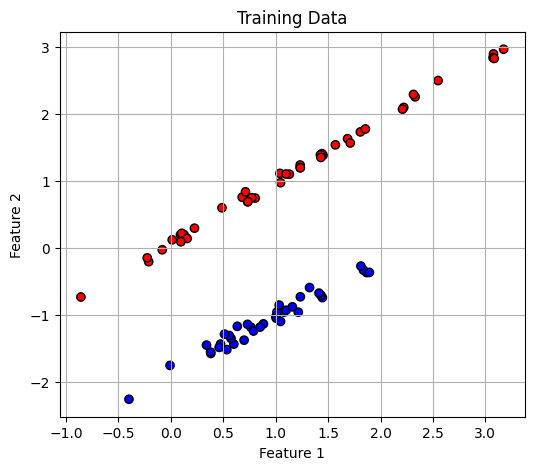

In [3]:
print("First 5 samples in X_train:\n", X_train[:5])
print("First 5 labels in y_train:\n", y_train[:5])

# Convert to NumPy for plotting
X_np = X_train.numpy()
y_np = y_train.numpy().flatten()

plt.figure(figsize=(6, 5))
plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, cmap="bwr", edgecolor='k')
plt.title("Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## Define the Neural Network with nn.Module
- input layer: 2 neurons
- hidden layer: 4 neurons with ReLU activation
- output layer: 1 neuron with Sigmoid activation

SimpleNN inherits from nn.Module
- super().init() initializes the base nn.Module class

In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(2, 4)
        self.output = nn.Linear(4, 1)
        self.activation = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.activation(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

model = SimpleNN()

## Define Loss Function and Optimizer
- BCELoss for binary classification
- Adam optimizer for better convergence
    - optimizer - algorithm that updates the weights and biases of a neural network during training to minimize the loss function
    - adam (adaptive moment estimation) - combines benefits on momentum and RMSProp
### Additional Notes
model.parameters() - a generator of all the trainable weights and biases

In [5]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## Training Loop
### Additional Notes
- model(X_train) - automatically calls model.forward(X_train)
- criterion(outputs, y_train) - computes BCE Loss



In [6]:
epochs = 1000

for epoch in range(epochs):
    # forward pass
    outputs = model(X_train)    # automatically calls model.forward(X_train)
    loss = criterion(outputs, y_train)
    
    # backward pass
    optimizer.zero_grad()   # sets all parameter gradients to zero
    loss.backward()
    optimizer.step()        # updates the parameters        

    # print every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.7164
Epoch 100, Loss: 0.0943
Epoch 200, Loss: 0.0250
Epoch 300, Loss: 0.0115
Epoch 400, Loss: 0.0059
Epoch 500, Loss: 0.0036
Epoch 600, Loss: 0.0024
Epoch 700, Loss: 0.0017
Epoch 800, Loss: 0.0013
Epoch 900, Loss: 0.0010
